For this project, your job is to determine the temperature of the Cosmic Microwave Background (CMB). In the same folder as this notebook, you should see a file called 'firas_monopole_spec_v1.txt'. This is data from the COBE satellite taken from this paper: https://ui.adsabs.harvard.edu/abs/1996ApJ...473..576F/abstract. You are going to fit this data with a blackbody spectrum to determine the temperature of the CMB.

You should also try exploring whatever else you might want to as you work.

Let's start by importing the modules we'll need. We're going to be working with data from a text file, doing numerical calulcations on arrays, and plotting at the very least.

In [40]:
#Import the necessary modules here
import pandas as pd
from astropy import units as u
from scipy.optimize import curve_fit
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt

Let's start by trying to understand the data. The first several lines in the text file explain the columns and units. Open the file in a text editor and read through it. Take note of the data types needed to store the data.

Now that you have feeling for what you're working with, let's read the data in to Python. I'd recommend reading into a Numpy array or a Data Frame/Data Table. Make sure that your data object has the shape and dtype you expect. The numpy.loadtxt() or pandas.read_csv() functions could be useful here. Also make sure that you handled the header correctly when reading in the data.

In [7]:
data = pd.read_csv('firas_monopole_spec_v1.txt', delim_whitespace = True, skiprows = 18, names = ['col1', 'col2', 'col3', 'col4', 'col5'])

/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_56773/2037790558.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('firas_monopole_spec_v1.txt', delim_whitespace = True, skiprows = 18, names = ['col1', 'col2', 'col3', 'col4', 'col5'])


So now we have the data, but what do we do with it? Well, let's get a better sense for it by plotting it. Make 1 or more plots that help you understand what the data looks like more or what the columns mean. You could make a scatter plot or error bar plot here, for example.

Now comes the work. Theory tells us that the CMB should be a near-perfect blackbody. Does the shape you saw in your plots seem to fit with that?

The blackbody spectrum is given by the following formula: $$B_{\nu}(T) = \frac{2 h\nu^3}{c^2} \frac{1}{e^{\frac{h\nu}{kT}} - 1}$$

The units of $B_{\nu}$ are Power/Solid Angle/Physical Area/Frequency, i.e. something like erg/s/cm2/sr/Hz

If you didn't before, you might want to import a package that can help you manage all these units! 

Unfortunately, the data we have uses wavenumber instead of frequency. Wavenumber is simply $n = 1/\lambda = \nu/c$. We'll need to rewrite the blackbody equation in terms of wavenumber. 

In [36]:
def BB(nu, T):
    #h_value = const.h.value
    #c_value = const.c.value
    #kb_value = const.k_B.value
    prefactor = 2*const.h*(nu*u.Hz)**3/const.c**2
    fraction = (np.exp(const.h*nu*u.Hz/(const.k_B * T*u.K)) - 1)**(-1)

    return ((prefactor*fraction)/u.sr).to(u.MJy/u.sr).value

In [49]:
nu = data.col1.values*const.c.to(u.cm/u.s).value

In [50]:
nu

array([6.80528880e+10, 8.15435486e+10, 9.53340016e+10, 1.08824662e+11,
       1.22315323e+11, 1.36105776e+11, 1.49596437e+11, 1.63386890e+11,
       1.76877550e+11, 1.90368211e+11, 2.04158664e+11, 2.17649325e+11,
       2.31139985e+11, 2.44930438e+11, 2.58421099e+11, 2.72211552e+11,
       2.85702212e+11, 2.99192873e+11, 3.12983326e+11, 3.26473987e+11,
       3.39964647e+11, 3.53755100e+11, 3.67245761e+11, 3.81036214e+11,
       3.94526875e+11, 4.08017535e+11, 4.21807988e+11, 4.35298649e+11,
       4.48789310e+11, 4.62579763e+11, 4.76070423e+11, 4.89860876e+11,
       5.03351537e+11, 5.16842198e+11, 5.30632651e+11, 5.44123311e+11,
       5.57913764e+11, 5.71404425e+11, 5.84895086e+11, 5.98685539e+11,
       6.12176199e+11, 6.25666860e+11, 6.39457313e+11])

In [37]:
popt, pcov = curve_fit(BB, nu, data.col2.values)

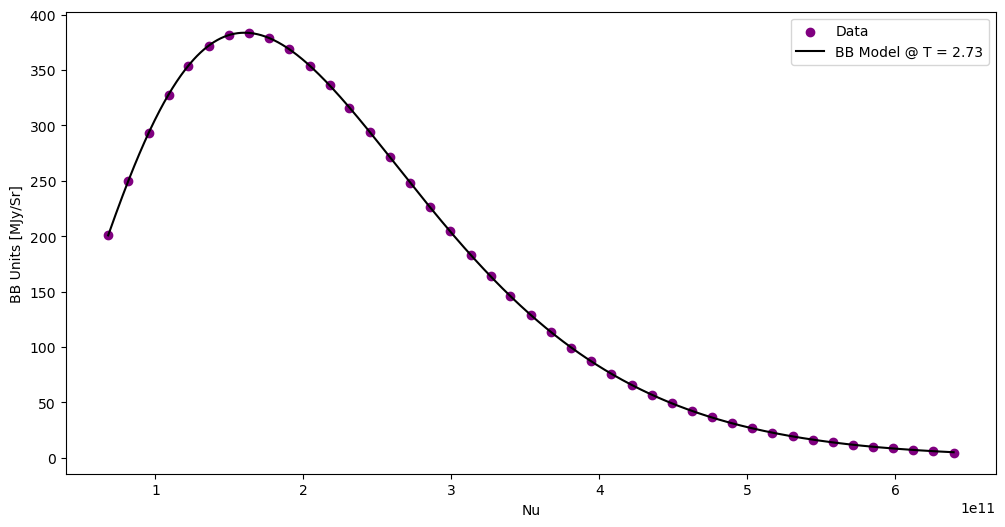

In [45]:
min_nu, max_nu = np.amin(nu), np.amax(nu)
xnu = np.linspace(min_nu, max_nu, 1000)

plt.figure(figsize = (12, 6))
plt.scatter(nu, data.col2.values, color = 'purple', label = 'Data')
plt.plot(xnu, BB(xnu, *popt), color = 'black', label = f'BB Model @ T = {popt[0]:.2f}')
plt.xlabel('Nu')
plt.ylabel('BB Units [MJy/Sr]')
plt.legend()
plt.show()